In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
import ipywidgets as widgets
# plt.rcParams.update({
#     "font.family": "serif",
# })

cm = 1/2.54  # centimeters in inches


## Trasformazione spazio-> rotazioni


In [2]:
def draw_plot_translation(transform,in_points, xmin=-15,xmax=15,ymin=-5,ymax=15,minrange=-10,maxrange=10,draw_polygon=False):
    """Plot complex transformation (shift)

    Args:
        transform (complex): complex number - transformation
        in_points (list): list of complex point to follow
        xmin (int, optional): . Defaults to -15.
        xmax (int, optional): . Defaults to 15.
        ymin (int, optional): . Defaults to -5.
        ymax (int, optional): . Defaults to 15.
        minrange (int, optional): _description_. Defaults to -10.
        maxrange (int, optional): _description_. Defaults to 10.
        draw_polygon (bool, optional): draw polygon between input points. Defaults to False.
    """    

  
    transform=transform
    in_points=in_points
    #If in_points is just a complex number and not a numpy array convert it to array
    if not(isinstance(in_points, np.ndarray)):
        in_points=np.array([in_points])
    
    #Add the first complex numebr to the and to close the polygon if needed  
    in_points=np.append(in_points,in_points[0])
        
    #apply the transformation (multiply transform with in_points)
    out_point=in_points + transform
    
    #set teh internal range for pyplot.plot
    xmin=xmin #max(xmin,out_point.real-1)
    xmax=xmax #min(xmax,out_point.real+1)
    ymin=ymin #min(ymin,out_point.imag-1)
    ymax=ymax #max(ymax,out_point.imag+1)
    
    #define figure , size, limits and ticks, force ratio 1:1
    fig, ax = plt.subplots()
    fig.set_size_inches(38*cm ,38*cm)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect(1)
    ax.set_xticks(np.arange(xmin, xmax, 1))
    ax.set_yticks(np.arange(ymin, ymax, 1))

    #Axis at (0,0)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #Grid dashed
    ax.grid(True, ls='--')
    
    min_range=min(minrange,xmin,ymin)
    
    max_range=max(maxrange,xmax,ymax)
    #max_range=int(2*np.abs(transform*xmax))

    x_axis=np.arange(min_range,max_range,1)
    y_axis=np.arange(min_range,max_range,1)*1j

    #Transform al the coordinate system

    x_axis_trans=transform + x_axis
    y_axis_trans = transform + y_axis
    
    #size of the point markers of the new coordinate system
    marker_size=3

    #plot the transformed coordinate system
    # for n in range(min_range,max_range):
    #     ax.plot((x_axis_trans+1j*transform*n).real,(x_axis_trans+1j*transform*n).imag,'o', ls='--',markersize=marker_size, color='gray')
    #     ax.plot((y_axis_trans+n*transform).real,(y_axis_trans+n*transform).imag,'go',ls='--',markersize=marker_size,color='gray')
      
    #size of the point markers and labels fonts
    marker_size=6
    font_size=12
    
    # set line style if draw polygon
    if draw_polygon:
        line_style1='-'
        line_style2='--'
    else:
        line_style1=''
        line_style2=''
        
    #plot input_points in red
    ax.plot(in_points.real,in_points.imag,'ro',linestyle=line_style1,markersize=marker_size)
    #plot outpout points in blue
    ax.plot(out_point.real,out_point.imag,'bo',linestyle=line_style2,markersize=marker_size)
    #plot the basis transformation z and jz
    ax.plot(transform.real,transform.imag,'mo',markersize=marker_size)
    #ax.plot(-transform.imag,transform.real,'mo',markersize=marker_size)
    #label for z, ij
    ax.annotate('$z$',xy=[transform.real,transform.imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='magenta')
    #ax.annotate('$j\cdot z$',xy=[(1j*transform).real,(1j*transform).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='m')
    #labels for all in_points and out_points in LaTeX
    for index in range(0,len(in_points)-1):
        #print("w{}".format(index))
        ax.annotate('$w_{}$'.format(index),xy=[(in_points[index]).real,(in_points[index]).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='red')
        ax.annotate('$w_{}+z$'.format(index),xy=[(out_point[index]).real,(out_point[index]).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='blue')


    plt.show()

In [3]:
def draw_plot_origin(transform,in_points,origin=0+0j, xmin=-15,xmax=15,ymin=-5,ymax=15,minrange=-10,maxrange=10,draw_polygon=False):
    """Plot complex transformation scale and rotate around point

    Args:
        transform (complex): complex number describing the transformation
        in_points (list of complex): point to follow
        origin (complex, optional): origin of the rotation. Defaults to 0+0j.
        xmin (int, optional): _description_. Defaults to -15.
        xmax (int, optional): _description_. Defaults to 15.
        ymin (int, optional): _description_. Defaults to -5.
        ymax (int, optional): _description_. Defaults to 15.
        minrange (int, optional): _description_. Defaults to -10.
        maxrange (int, optional): _description_. Defaults to 10.
        draw_polygon (bool, optional): _description_. Defaults to False.
    """    
    
    if isinstance(origin,str):
        origin=complex(origin)
    else:
        isinstance(origin,complex)
        origin=origin

    if isinstance(transform,str):
        transform=complex(transform)
    else:
        isinstance(transform,complex)
        transform=transform
 
    
   

    #If in_points is just a complex number and not a numpy array convert it to array
    if not(isinstance(in_points, np.ndarray)):
        in_points=np.array([in_points])
    
    #Add the first complex numebr to the and to close the polygon if needed  
    in_points=np.append(in_points,in_points[0])
        
    #apply the transformation (multiply transform with in_points)
    out_point=(in_points -origin) * transform + origin
    
    #set teh internal range for pyplot.plot
    xmin=xmin #max(xmin,out_point.real-1)
    xmax=xmax #min(xmax,out_point.real+1)
    ymin=ymin #min(ymin,out_point.imag-1)
    ymax=ymax #max(ymax,out_point.imag+1)
    
    #define figure , size, limits and ticks, force ratio 1:1
    fig, ax = plt.subplots()
    fig.set_size_inches(38*cm ,38*cm)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect(1)
    ax.set_xticks(np.arange(xmin, xmax, 1))
    ax.set_yticks(np.arange(ymin, ymax, 1))

    #Axis at new origin

    #ax.spines['bottom'].set_position(('data',origin.real))
    #ax.spines['left'].set_position(('data',origin.imag))
    
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #Grid dashed
    ax.grid(True, ls='--')
    
    min_range=min(minrange,xmin,ymin)
    
    max_range=max(maxrange,xmax,ymax)
    #max_range=int(2*np.abs(transform*xmax))

    x_axis=np.arange(min_range,max_range,1)
    y_axis=np.arange(min_range,max_range,1)*1j

    #Transform al the coordinate system

    x_axis_trans=transform * x_axis
    y_axis_trans = transform * y_axis
    
    #size of the point markers of the new coordinate system
    marker_size=3

    #plot the transformed coordinate system
    for n in range(min_range,max_range):
        ax.plot((origin+x_axis_trans+1j*transform*n).real,(origin+x_axis_trans+1j*transform*n).imag,'o', ls='--',markersize=marker_size, color='gray',linewidth=0.5)
        ax.plot((origin+y_axis_trans+n*transform).real,(origin+y_axis_trans+n*transform).imag,'go',ls='--',markersize=marker_size,color='gray',linewidth=0.5)
      
    #size of the point markers and labels fonts
    marker_size=6
    font_size=12
    
    # set line style if draw polygon
    if draw_polygon:
        line_style1='-'
        line_style2='--'
    else:
        line_style1=''
        line_style2=''
        
    ax.vlines(origin.real,ymin,ymax)
    ax.hlines(origin.imag,xmin,xmax)
    #plot input_points in red
    ax.plot(in_points.real,in_points.imag,'ro',linestyle=line_style1,markersize=marker_size)
    #plot outpout points in blue
    ax.plot(out_point.real,out_point.imag,'bo',linestyle=line_style2,markersize=marker_size)
    #plot the basis transformation z and jz
    ax.plot((origin+transform).real,(origin+transform).imag,'mo',markersize=marker_size)
    ax.plot(origin.real+(-transform).imag,origin.imag +transform.real,'mo',markersize=marker_size)
    #label for z, ij
    ax.annotate('$z$',xy=[(origin+transform).real,(origin+transform).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='magenta')
    ax.annotate('$j\cdot z$',xy=[(origin+1j*transform).real,(origin+1j*transform).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='m')
    #labels for all in_points and out_points in LaTeX
    
    for index in range(0,len(in_points)-1):
        #print("w{}".format(index))
        ax.annotate('$w_{}$'.format(index),xy=[(in_points[index]).real,(in_points[index]).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='red')
        ax.annotate('$z\cdot w_{}$'.format(index),xy=[(out_point[index]).real,(out_point[index]).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='blue')

 
  
    ax.set_title("Origin O={:.2f}+{:.2f}j \n Transformation $(w-O)\cdot z + O$".format(origin.real,origin.imag))
    plt.show()

# Traslazione

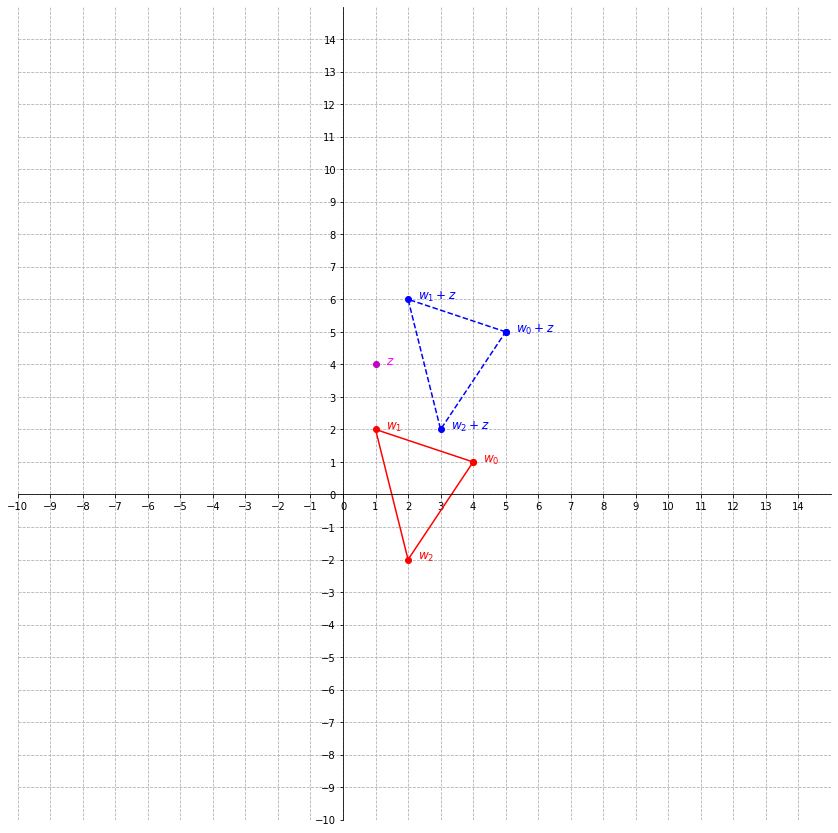

In [4]:
# TRASFORMAZIONE

z_transformation=1+4j
#z_transformation=np.exp(1j*np.pi)
#2*np.exp(1j*np.pi/3)

#LISTA INPUTS

w_input=np.array([4+1j,1+2j,2-2j])
#w_input=2-3j #np.array([3+2j])

#ORIGINE
origin=0

xmin=-10
xmax=15
ymin=-10
ymax=15

draw_plot_translation(
    transform=z_transformation,
    in_points=w_input,
    ymin=ymin,
    ymax=ymax,
    xmin=xmin,
    xmax=xmax,
    draw_polygon=True,
    minrange=-10,
    maxrange=10,
    )
#,maxrange=50,minrange=-50)

# Rotazione rispetto ad un punto

C:\Users\fulviof\AppData\Local\Temp\ipykernel_21996\4226226774.py:90: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  ax.plot((origin+y_axis_trans+n*transform).real,(origin+y_axis_trans+n*transform).imag,'go',ls='--',markersize=marker_size,color='gray',linewidth=0.5)


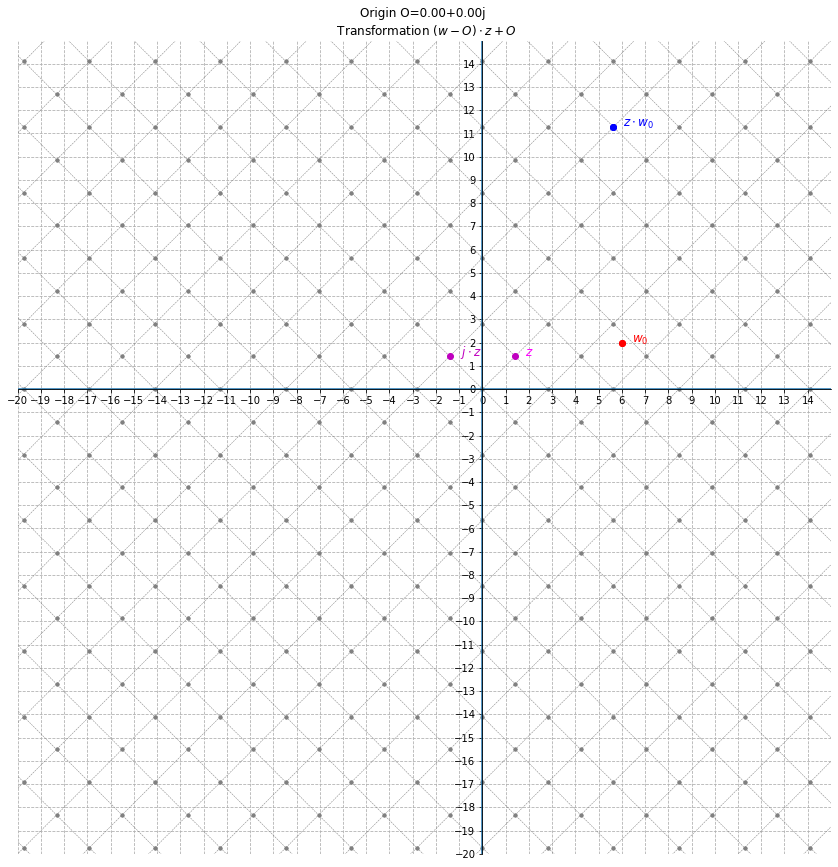

In [19]:
#z_transformation=np.exp(1j*np.pi)
# TRASFORMAZIONE
z_transformation=1.41 +1.41*1j


#2*np.exp(1j*np.pi/3)
#w_input=[1+3j] 
#np.array([3+2j])
#LISTA DI INPUTS
# w_input=np.array([4+1j,3+2j,2-2j])

#ORIGINE DELLA ROTAZIONE
origin=0+0j



xmin=-20
xmax=15
ymin=-20
ymax=15



draw_plot_origin(
    transform=z_transformation,
    in_points=w_input,
    origin=origin,
    ymin=ymin,
    ymax=ymax,
    xmin=xmin,
    xmax=xmax,
    # draw_polygon=True
)


In [6]:
origin_widget=widgets.Text(
    value='1+1j')
z_transform_widget=widgets.Text(
    value='1+2j')
w_input=np.array([6+2j])


widgets.interact(
    draw_plot_origin,   
    transform=z_transform_widget,
    in_points=widgets.fixed(w_input),
    origin=origin_widget,
    ymin=-20,
    ymax=20,
    xmin=-20,
    xmax=20,
    draw_polygon=True,
    minrange=widgets.fixed(-10),
    maxrange=widgets.fixed(10),
    
)

interactive(children=(Text(value='1+2j', description='transform'), Text(value='1+1j', description='origin'), I…

<function __main__.draw_plot_origin(transform, in_points, origin=0j, xmin=-15, xmax=15, ymin=-5, ymax=15, minrange=-10, maxrange=10, draw_polygon=False)>

In [7]:
origin=widgets.Text(
    value='3+1j')
b='test'

In [8]:
a=complex(origin.value)

In [9]:
2*a

(6+2j)

In [10]:
if isinstance(origin.value,str):
    print(origin.value)

3+1j
